In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
import PIL
import numpy as np
import math
from scipy.ndimage.interpolation import affine_transform

In [1]:
def jitter(image, angle, center, new_center, scale):
    angle = -angle/180.0*math.pi
    nx,ny = x,y = center
    sx=sy=1.0
    (nx,ny) = new_center
    (sx,sy) = scale
    cosine = math.cos(angle)
    sine = math.sin(angle)
    a = cosine/sx
    b = sine/sx
    c = x-nx*a-ny*b
    d = -sine/sy
    e = cosine/sy
    f = y-nx*d-ny*e
    image = image.convert('RGBA')
    image = image.transform(image.size, Image.AFFINE, (a,b,c,d,e,f))
    
    fff = Image.new('RGBA', image.size, (255,)*4)
    image = Image.composite(image, fff, image)
    
    return image.convert('RGBA')

def jitter_random(image):
    r = lambda v: v * (.5 - np.random.rand())
    width, height = image.size
    
    angle = r(20)
    center = width/2 + r(width/10), height/2 + r(height/10)
    new_center = width/2 + r(width/20), height/2 + r(height/20)
    scale = 1 + r(.3), 1 + r(.3)
    
    return jitter(image, angle, center, new_center, scale)

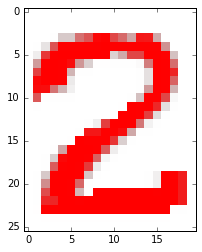

In [19]:
rank_3 = Image.open('res/cards/rank_2.png')
rank_3_arr = np.asarray(rank_3).copy()
rgb = rank_3_arr[:,:,1:3]
rank_3_arr[:,:,1:3][np.where(rgb == 255)] = 0
blank = Image.new(mode='RGBA',size=rank_3.size,color=1)
blank.paste(Image.fromarray(rank_3_arr))
rank_3 = blank

rank_3 = jitter_random(rank_3)
rank_3_arr = np.asarray(rank_3).copy()

plt.imshow(rank_3_arr, interpolation='none')

In [220]:
def warp(image):
    width, height = image.size
    
    r = lambda v: v * (.5 - np.random.rand())
    x, y = width/2 + r(width/10), height/2 + r(height/10)
    angle = r(math.pi * .1)
    
    nx, ny = width/2 + r(width/20), height/2 + r(height/20)
    sx, sy = 1 + r(.3), 1 + r(.3)
    
    cosine = math.cos(angle)
    sine = math.sin(angle)
    a = cosine/sx
    b = sine/sx
    c = x-nx*a-ny*b
    d = -sine/sy
    e = cosine/sy
    f = y-nx*d-ny*e
    
    image = image.transform(image.size, Image.AFFINE, (a,b,c,d,e,f))
    
    return image.convert('RGBA')

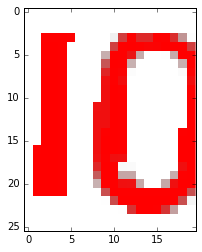

In [234]:
rank_3 = Image.open('res/cards/rank_10.png')
rank_3_arr = np.asarray(rank_3).copy()
rgb = rank_3_arr[:,:,1:3]
rank_3_arr[:,:,1:3][np.where(rgb == 255)] = 0
blank = Image.new(mode='RGBA',size=rank_3.size,color=1)
blank.paste(Image.fromarray(rank_3_arr))
rank_3 = blank

rank_3 = warp(rank_3)
rank_3_arr = np.asarray(rank_3).copy()

plt.imshow(rank_3_arr, interpolation='none')